In [4]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.feature import peak_local_max
from skimage.io import imread, imshow
from scipy.signal import convolve2d
%matplotlib inline 
from matplotlib_scalebar.scalebar import ScaleBar

## Load data

In [5]:
path = os.getcwd()
path_images = path + "\\test_data\\"
file_names = [x for x in os.listdir(path_images) if "tiff" in x]
print("Total tiffs in dir: {0}".format(len(file_names)))

Total tiffs in dir: 2


Total slices in stack: 3


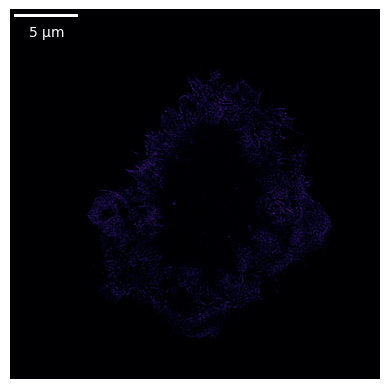

In [35]:
ret, image = cv2.imreadmulti(path_images+file_names[0], [], cv2.IMREAD_UNCHANGED)
print("Total slices in stack: {0}".format(len(image)))
img = image[0]
plt.imshow(img, cmap="inferno")
scalebar = ScaleBar(27, "nm", box_color="None", color="white", location="upper left") 
plt.gca().add_artist(scalebar)
plt.axis("off");

## Normalise each frame by maximum intensity

In [7]:
norm_data = [(img - np.min(img)) / np.max(img - np.min(img)) for img in image]
np.array(norm_data)
[[d.shape, np.max(d)] for d in norm_data]

[[(1080, 1080), 1.0], [(1080, 1080), 1.0], [(1080, 1080), 1.0]]

## Second-order steerable filter applied to three bottom-most frames
- $\sigma$=2.0
- (for the sample data, there were only three bottom-most frames anyway)
- is the second-order 
- [implement convolution](https://pyimagesearch.com/2016/07/25/convolutions-with-opencv-and-python/#:~:text=All%20we%20need%20to%20do,operations%20into%20a%20single%20value.)
- [intuitive convolution, wow](https://stackoverflow.com/questions/42883547/intuitive-understanding-of-1d-2d-and-3d-convolutions-in-convolutional-neural-n)

In [8]:
sig = 2
nom = (1/(2*np.pi*sig**2))
X = np.array([[-1,0,1], [-1,0,1], [-1,0,1]])
Y = np.transpose(X)
exp = -(X**2+Y**2)/(2*sig**2)
gauss2d = nom*np.e**(exp)

In [9]:
cimg = convolve2d(norm_data[0], gauss2d, boundary='symm', mode='same')

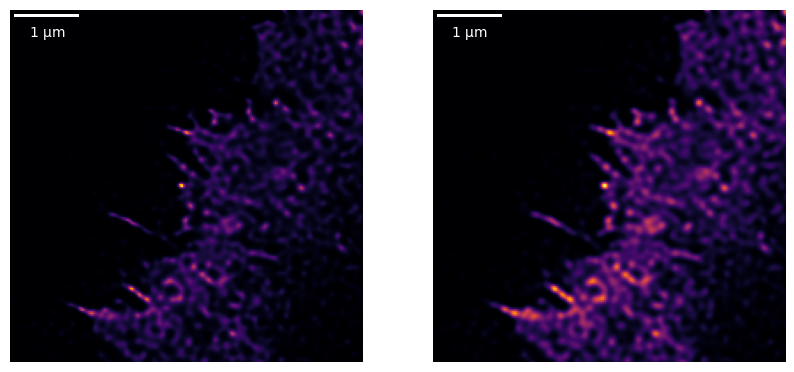

In [36]:
fig = plt.figure(figsize=(10,10))
fig.add_subplot(1,2,1)
plt.imshow(norm_data[0][300:500,300:500], cmap="inferno")
scalebar = ScaleBar(27, "nm", box_color="None", color="white", location="upper left") 
plt.gca().add_artist(scalebar)
plt.axis("off")
fig.add_subplot(1,2,2)
plt.imshow(cimg[300:500,300:500], cmap="inferno")
scalebar = ScaleBar(27, units="nm", box_color="None", color="white", location="upper left") 
plt.gca().add_artist(scalebar)
plt.axis("off");

In [11]:
from scipy.ndimage import gaussian_filter
scimg = gaussian_filter(input=norm_data[0], sigma=2.0, order=2)

- [scipy gaussian filter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html)
- [EPFL BIG steerable](http://bigwww.epfl.ch/demo/steerable/download.html)
- [steerableJ](https://biii.eu/steerablej)
- [building recognition project, implemented steerable filter](https://github.com/mitchdull/sfbr)
- [imageJ process manual](https://imagej.nih.gov/ij/docs/guide/146-29.html)
- [3D imagej plugin source](https://github.com/pam66/steerable3D/blob/master/src/main/java/eu/marbilab/imagej/Steerable3D_.java)

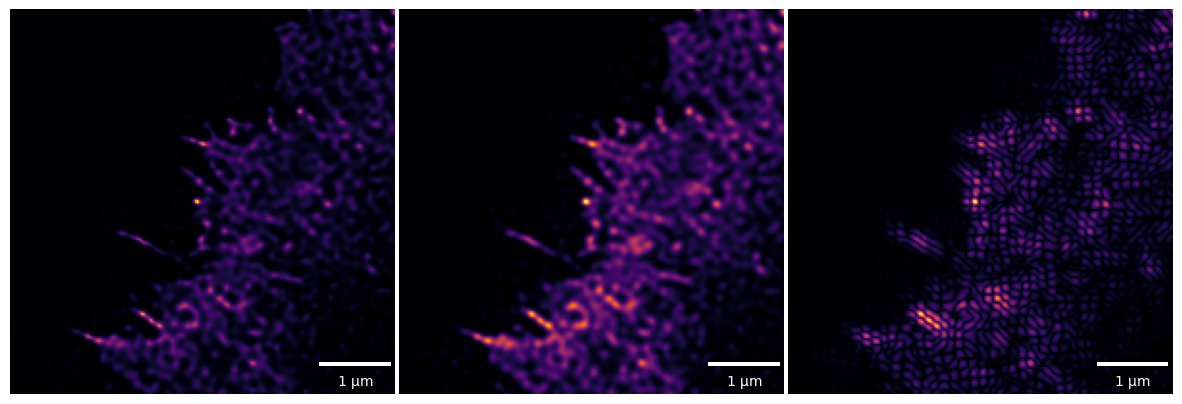

In [32]:
fig = plt.figure(figsize=(15,10))
plt.subplots_adjust(wspace=0.01, hspace=0)
fig.add_subplot(1,3,1)
plt.imshow(norm_data[0][300:500,300:500], cmap="inferno")
scalebar = ScaleBar(27, "nm", box_color="None", color="white", location="lower right") 
plt.gca().add_artist(scalebar)
plt.axis("off")
fig.add_subplot(1,3,2)
plt.imshow(cimg[300:500,300:500], cmap="inferno")
scalebar = ScaleBar(27, "nm", box_color="None", color="white", location="lower right") 
plt.gca().add_artist(scalebar)
plt.axis("off")
fig.add_subplot(1,3,3)
plt.imshow(np.absolute(scimg[300:500,300:500]), cmap="inferno")
scalebar = ScaleBar(27, "nm", box_color="None", color="white", location="lower right") 
plt.gca().add_artist(scalebar)
plt.axis("off");

## Minimum z-projection of three bottommost stacks

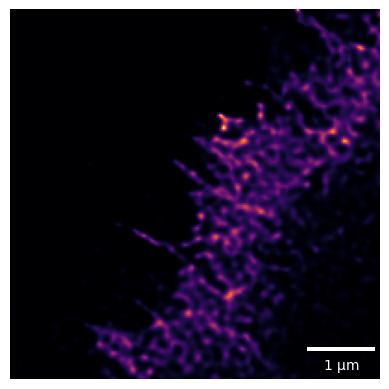

In [31]:
min_z_proj = np.array([min(row) for row in np.transpose(np.array(norm_data).ravel().reshape((3,1080*1080)))]).reshape(1080,1080)
plt.imshow(min_z_proj[300:500,300:500], cmap="inferno")
scalebar = ScaleBar(27, "nm", box_color="None", color="white", location="lower right") 
plt.gca().add_artist(scalebar)
plt.axis("off");

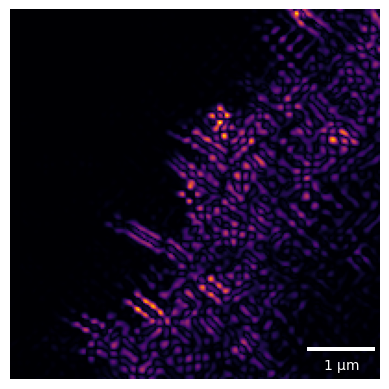

In [43]:
# 2 am psychedelics using abs vals from scipy second order gaussian filter
from functools import partial
scipy_res = [gaussian_filter(input=i, sigma=2.0, order=2) for i in norm_data]
min_z_proj = np.array([min(row) for row in np.transpose(np.array(scipy_res).ravel().reshape((3,1080*1080)))]).reshape(1080,1080)
plt.imshow(np.abs(min_z_proj[300:500,300:500]), cmap="inferno")
scalebar = ScaleBar(27, "nm", box_color="None", color="white", location="lower right") 
plt.gca().add_artist(scalebar)
plt.axis("off");

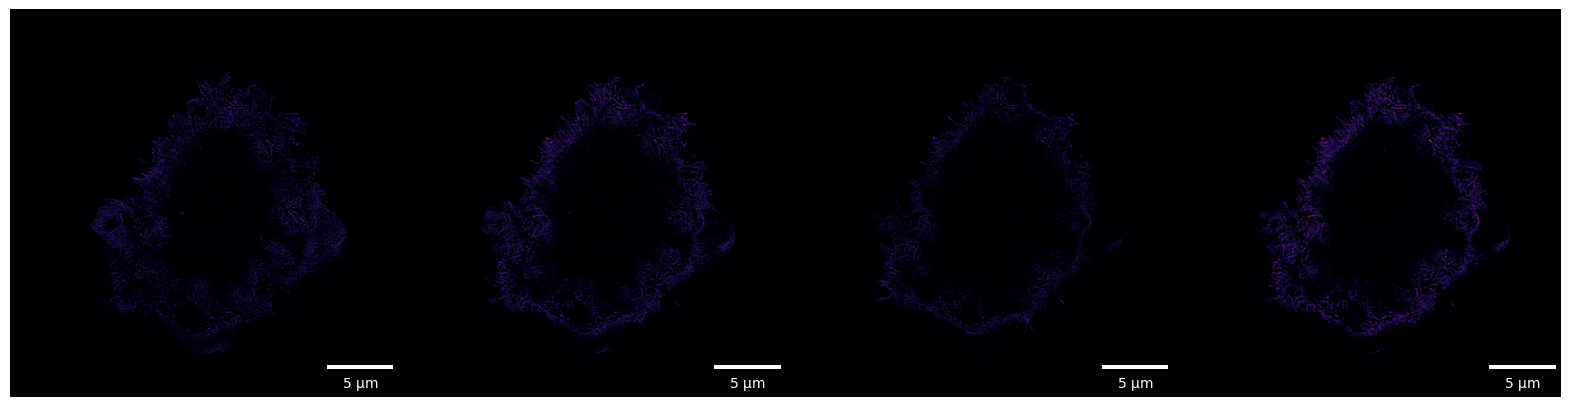

In [30]:
fig = plt.figure(figsize=(20,10))
plt.subplots_adjust(wspace=0, hspace=0)
fig.add_subplot(1,4,1)
plt.imshow(norm_data[0], cmap="inferno")
scalebar = ScaleBar(27, "nm", box_color="None", color="white", location="lower right") 
plt.gca().add_artist(scalebar)
plt.axis("off")
fig.add_subplot(1,4,2)
plt.imshow(norm_data[1], cmap="inferno")
scalebar = ScaleBar(27, "nm", box_color="None", color="white", location="lower right") 
plt.gca().add_artist(scalebar)
plt.axis("off")
fig.add_subplot(1,4,3)
plt.imshow(norm_data[2], cmap="inferno")
scalebar = ScaleBar(27, "nm", box_color="None", color="white", location="lower right") 
plt.gca().add_artist(scalebar)
plt.axis("off")
fig.add_subplot(1,4,4)
plt.imshow(min_z_proj, cmap="inferno")
scalebar = ScaleBar(27, "nm", box_color="None", color="white", location="lower right") 
plt.gca().add_artist(scalebar)
plt.axis("off");

## Threshold at arbitrarily low value

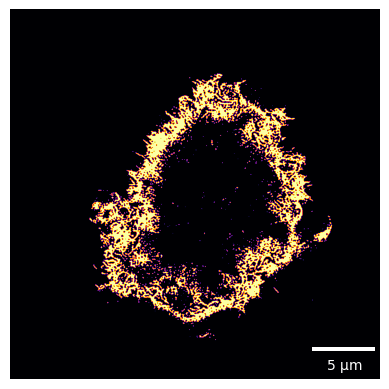

In [29]:
res = np.array([1 if p > 0.015 else 0 for p in min_z_proj.ravel()]).reshape(1080,1080)
plt.imshow(res, cmap="inferno")
scalebar = ScaleBar(27, "nm", box_color="None", color="white", location="lower right") 
plt.gca().add_artist(scalebar)
plt.axis("off");

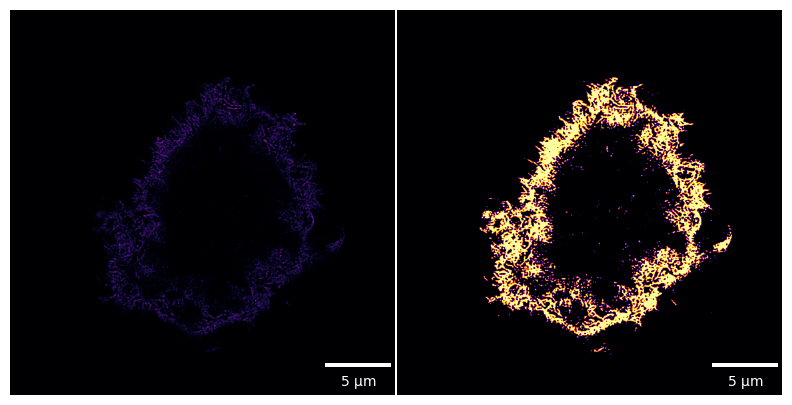

In [28]:
fig = plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0, hspace=0)
fig.add_subplot(1,2,1)
plt.imshow(min_z_proj, cmap="inferno")
scalebar = ScaleBar(27, "nm", box_color="None", color="white", location="lower right") 
plt.gca().add_artist(scalebar)
plt.axis("off");
fig.add_subplot(1,2,2)
plt.imshow(res, cmap="inferno")
scalebar = ScaleBar(27, "nm", box_color="None", color="white", location="lower right") 
plt.gca().add_artist(scalebar)
plt.axis("off");

## Next steps
- fill of background pixels surrounded by object pixels --> cell segmented throughout entire plane --> area of the mesh 
- compare n_pixels in unfilled and filled image --> % mesh intensity 
- size of gaps = invert filled image and use connected component analysis // region props 
    - matlab `region props` with the `EquivDiameter` and `area` parameters
    - generate circular are == gap size --> size of gap and diameter 

## Technical details
- pixel size of STED images (25 or 33 nm in paper)
- "F-actin mesh sizes from at least 15 individual cells over the course of at least three independent experiments"

## More resources 
- [Calthech: Introduction to image processing with scikit-image](https://justinbois.github.io/bootcamp/2018_epfl/lessons/l34_intro_to_image_processing.html)
- [Caltech, Lesson 45: Basic image quantification](http://justinbois.github.io/bootcamp/2022/lessons/l45_segmentation.html)

## Maximum projection using NumPy


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

path = "test.tif"
IM = io.imread(path)
IM_MAX= np.max(IM, axis=0)
plt.imshow(IM_MAX)

## Voronoi diagrams

- [applications, list](https://www.ics.uci.edu/~eppstein/gina/scot.drysdale.html)
- [color them in python](https://stackoverflow.com/questions/20515554/colorize-voronoi-diagram)
- [color by physical quantity](https://stackoverflow.com/questions/41244322/how-to-color-voronoi-according-to-a-color-scale-and-the-area-of-each-cell)